In [10]:
############## Event-DRIVEN COLLISIONS ####################################
###########################################################################

#### This Program simulates the motion of four atoms in a 2D box ######
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pt
from ipywidgets import*






#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad,L_box):  
    if velcomp > 0.0:
        del_t = (L_box - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t


# Function to calculate time it takes for a pair of atoms to collide. 
# pos1 and pos2 are positions of atoms 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the atoms. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t


##########################################################################


######################### Initialization #################################
print("Initializing (cunstruct square lattice)")
print("Adjust sliders such that all  N*N balls lies within the box. ")
print("Direction of  velocities will be different when slider is changed becuz it;s random array")

n_events_wd = IntSlider(value = 10,min = 5,max = 70)
def f_main(L,N,rho,spac,SNAP):
    global n_events_wd,L_box,Ratom,positions,velocities,Natoms
    velocities = np.random.uniform(low = -1.0,high = 1.0 ,size = (N*N,2))
    Natoms = N*N
    Ratom = np.sqrt((rho*L*L)/(Natoms*np.pi))
    print ("Radius of disk = " ,Ratom)
  
    L_box= L

    
    pos = np.array([],dtype = float)
    for i in range(0,N):
        for j in range(0,N):
          
            pos = np.append(pos,((2+i*spac)*Ratom,(2+j*spac)*Ratom))
       
    positions = pos.reshape(Natoms,2)   

    fig,ax = plt.subplots(figsize = (10,8))
    ax.set_xlim([0,L])
    ax.set_ylim([0,L])
    
    ax.set_title("Initial configuration")
 
    for x,y in positions:
        PP = pt.Circle((x,y),radius = Ratom,color = 'c')
        ax.add_patch(PP)
    
    
    
    for i in range(N*N):
        QQ = pt.Arrow(positions[i,0],positions[i,1],0.12*velocities[i,0],0.12*velocities[i,1],width = 0.07,color='k')
        ax.add_patch(QQ)
    plt.show()


    

    if(SNAP == True):

        n_events = n_events_wd.value
        
        pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

        ## Positions and velocities as numpy arrays.






        ############### Event Loop ##############################################
        for iter in range(n_events):
            # Wall collision times for all atoms and their velocity components.
            wall_times = [wall_time(positions[i,j], velocities[i][j], Ratom,L_box) for i in range(Natoms) for j in range(2)] 
            # Pair collision times
            pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
            # The next collision iter is the minimum of wall and pair collision times.

            next_iter = min(wall_times + pair_times)  
            
            for i in range(Natoms):
                positions[i] += velocities[i]*abs(next_iter) # Evolve positions to collision iter
            if min(wall_times) < min(pair_times): # Check if next iter is a collision with a wall
                wall_index = wall_times.index(next_iter)
                particle, component = wall_index/2, wall_index%2
                velocities[int(particle),int(component)] *= -1.0 ## Velocity component normal to wall changes sign
            else:
                pair_index = pair_times.index(next_iter)
                particle_1, particle_2 = pairs[pair_index] # Indices of atoms participating in collision.
                rel_pos = positions[particle_2] - positions[particle_1]
                rel_vel = velocities[particle_2] - velocities[particle_1]
                distance = np.sqrt(np.dot(rel_pos,rel_pos))
                unit_perp = rel_pos/distance
                scal_prod = np.dot(rel_vel,unit_perp)
                velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
                velocities[particle_2] -= scal_prod*unit_perp

            fig,ax = plt.subplots(figsize = (10,8))
            ax.set_xlim([0,L])
            ax.set_ylim([0,L])
            ax.set_title(" Event : " +str(iter+1))
            for x,y in positions:
                PP = pt.Circle((x,y),radius = Ratom,color = 'r')
                ax.add_patch(PP)
            
            
            
                
            for i in range(N*N):
                QQ = pt.Arrow(positions[i,0],positions[i,1],0.12*velocities[i,0],0.12*velocities[i,1],width = 0.07,color = 'k')
                ax.add_patch(QQ)
            plt.show()



 

####################################################

print("ADJUST NUMBER OF EVENTS")
display(n_events_wd)    
ws = interactive(f_main, L = FloatSlider(description  = "Length of square",value = 1.0,min = 0.1,max = 10.0,layout = {'width':'600px'}),
                        N = IntSlider(description = "N*N atoms",value = 2,min = 2,max = 10,layout = {'width':'600px'}),
                        rho = FloatSlider(description = 'density',value = 0.1,min = 0.1,max = 0.9,layout = {'width':'600px'}),
                        spac = FloatSlider(description = 'adjusting space',value = 3.0,min = 0.1,max = 20.0,layout = {'width':'600px'}),
                        
                        SNAP = False)
                         
ws

Initializing (cunstruct square lattice)
Adjust sliders such that all  N*N balls lies within the box. 
Direction of  velocities will be different when slider is changed becuz it;s random array
ADJUST NUMBER OF EVENTS


IntSlider(value=10, max=70, min=5)

interactive(children=(FloatSlider(value=1.0, description='Length of square', layout=Layout(width='600px'), max…

## Now we will use  the last position array obtained from above simulation and reverse the velocity i.e.  We will see whether we get configuration of " Event : 1"(with velocity reversed) or not

In [13]:
velocities = -1.0*velocities
positions = positions

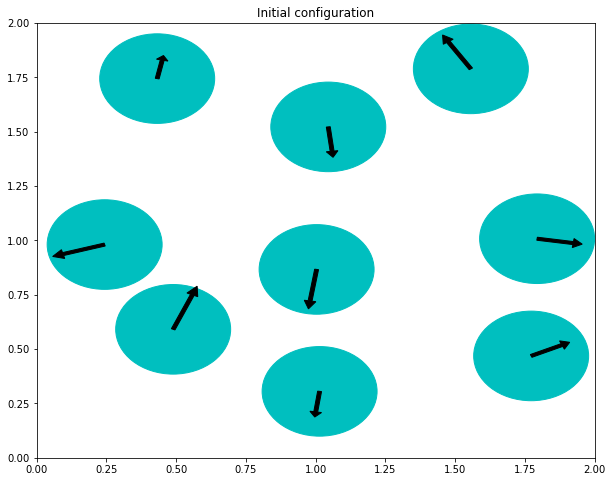

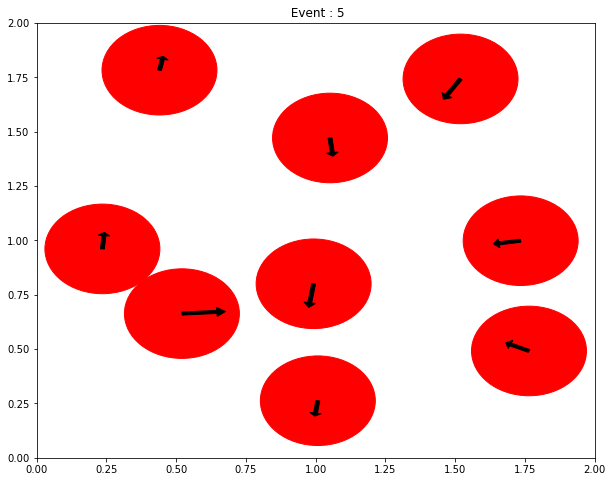

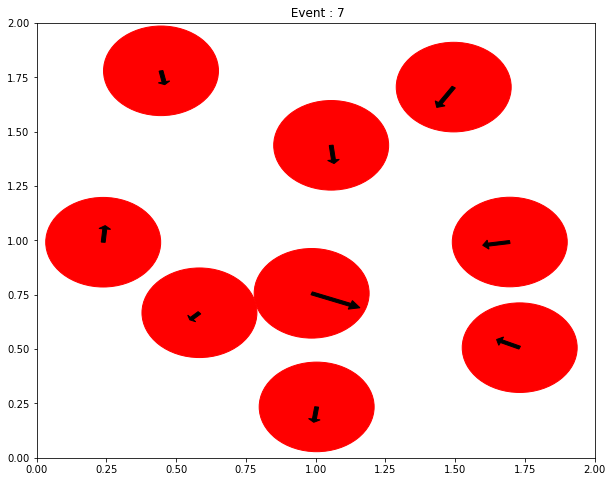

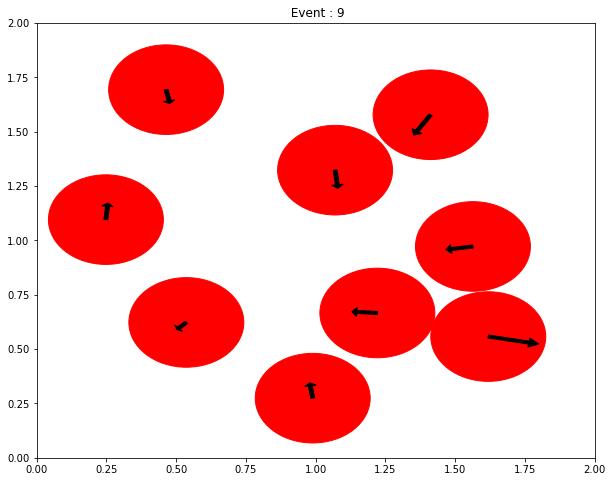

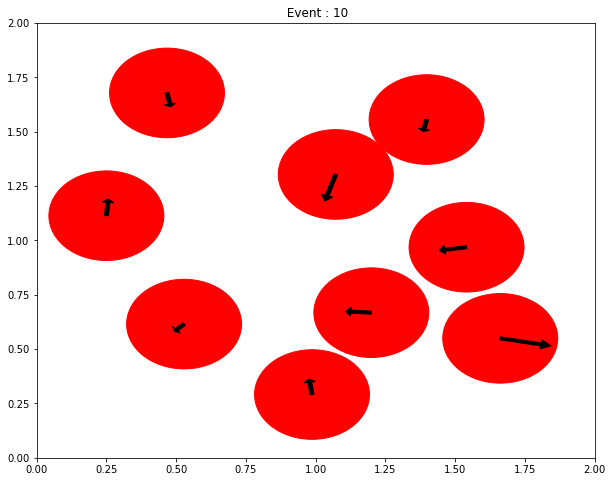

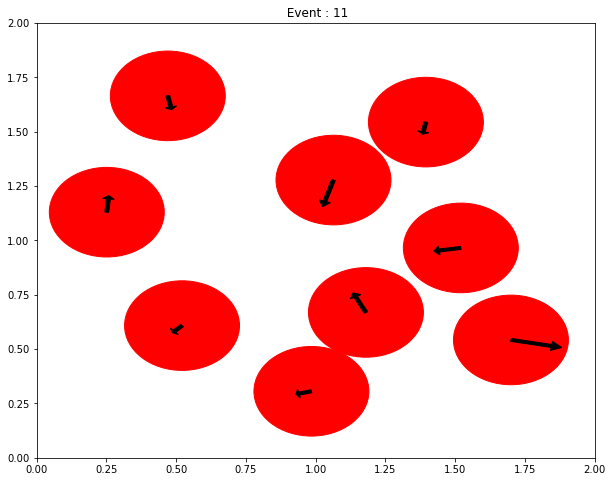

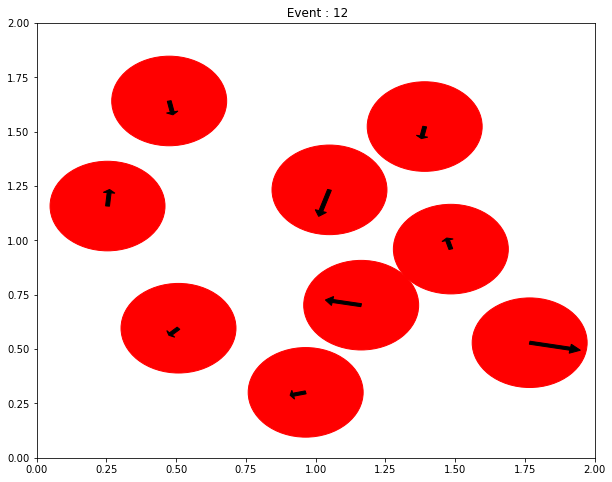

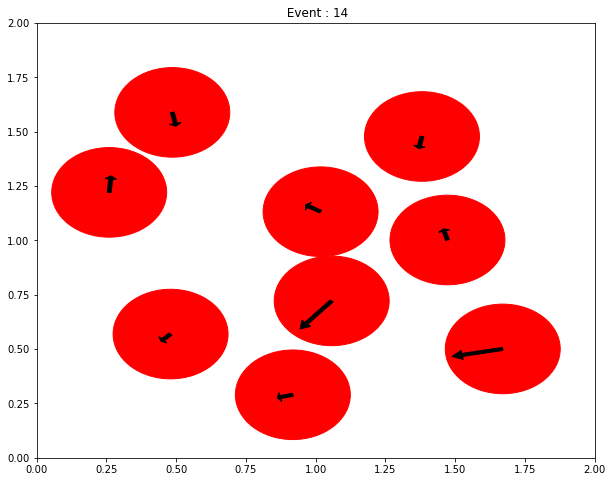

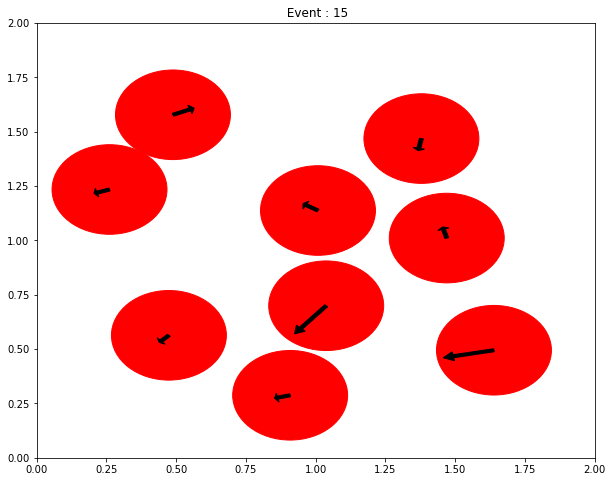

In [14]:

## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

## Positions and velocities as numpy arrays.


fig,ax = plt.subplots(figsize = (10,8))
ax.set_xlim([0,L_box])
ax.set_ylim([0,L_box])

ax.set_title("Initial configuration")

for x,y in positions:
    PP = pt.Circle((x,y),radius = Ratom,color = 'c')
    ax.add_patch(PP)



for i in range(Natoms):
    QQ = pt.Arrow(positions[i,0],positions[i,1],0.1*(L_box)*velocities[i,0],0.1*(L_box)*velocities[i,1],width = 0.07,color = 'k')
    ax.add_patch(QQ)
plt.show()


n_events = n_events_wd.value # Number of collision iters.

############### Event Loop ##############################################
for iter in range(n_events):
    # Wall collision times for all atoms and their velocity components.
    wall_times = [wall_time(positions[i,j], velocities[i][j], Ratom,L_box) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision iter is the minimum of wall and pair collision times.

    next_iter = min(wall_times + pair_times)  
    
    for i in range(Natoms):
        positions[i] += velocities[i]*next_iter # Evolve positions to collision iter
    if min(wall_times) < min(pair_times): # Check if next iter is a collision with a wall
        wall_index = wall_times.index(next_iter)
        particle, component = wall_index/2, wall_index%2
        velocities[int(particle),int(component)] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_iter)
        particle_1, particle_2 = pairs[pair_index] # Indices of atoms participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
        fig,ax = plt.subplots(figsize = (10,8))
        ax.set_xlim([0,L_box])
        ax.set_ylim([0,L_box])
        ax.set_title(" Event : " +str(iter+1))
        for x,y in positions:
            PP = pt.Circle((x,y),radius = Ratom,color = 'r')
            ax.add_patch(PP)




        for i in range(Natoms):
            QQ = pt.Arrow(positions[i,0],positions[i,1],0.12*velocities[i,0],0.12*velocities[i,1],width = 0.07,color = 'k')
            ax.add_patch(QQ)
        plt.show()


### Hence we got the configuration as we desired. Note that  we could only get this because number of iterations were  small. When this number increases system reaches to equilibrium then this time reversal won't be there.
